Зависимые случайные величины

оба игрока извлекут черву = 2/8  *  1/7   =  1/28  
оба игрока извлекут не черву = 6/8  *  5/7   =  15/28
один извлечёт черву, а другой нет = 2/8   *  6/7  =  6/28
наоборот = 6/8 * 2/7   = 6/28



In [71]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [73]:
mx = .25
my = 0.25



X = np.array([0,1])
Y = np.array([0,1])

p = np.array([[15/28, 6/28],[6/28, 1/28]])



In [82]:
p

array([[0.53571429, 0.21428571],
       [0.21428571, 0.03571429]])

In [75]:
# cov(X,Y) = M[(X - mx)]*(Y - my)]
# НАШИ ОТКЛОНЕНИЯ
dx = X - mx
dy = Y - my


In [76]:
dx 

array([-0.25,  0.75])

In [77]:
dy

array([-0.25,  0.75])

In [78]:
# В ЭТУ МАТРИЦУ ВСЕ СКЛАДЫВАТЬ БУДЕМ
s = np.zeros((2,2))

In [79]:
# Цикл - формула расчёта ковариации.
# В массиве содержатся произведения сумма которых даст ковариацию.
# 
# Функция cov обрабатывает 2 статистические выборки без учета общего закона распределения 2-х величин.
# Цикл учитывает закон распределения.
#

for i in range(2):
    for j in range(2):
        s[i,j] = dx[i]*dx[j]*p[i,j]

In [85]:
dx[i]

0.75

In [86]:
dx[j]

0.75

In [81]:
# В массиве содержатся произведения сумма которых даст ковариацию.
s

array([[ 0.03348214, -0.04017857],
       [-0.04017857,  0.02008929]])

In [87]:
#s

s.sum()

-0.02678571428571428

In [88]:
np.cov(X,Y)

array([[0.5, 0.5],
       [0.5, 0.5]])

Дискретный вариационный ряд

In [89]:
# 4, 5, 6, 4, 4, 2, 3, 5, 4, 4, 5, 2, 3, 3, 4, 5, 5, 2, 3, 6, 5, 4, 6, 4, 3

base = np.array([4, 5, 6, 4, 4, 2, 3, 5, 4, 4, 5, 2, 3, 3, 4, 5, 5, 2, 3, 6, 5, 4, 6, 4, 3])
x = np.array([2,3,4,5,6])
n = np.array([3,5,8,6,3])

In [90]:
# эмпирическая функция 
n.sum()

25

In [97]:
base.shape

(25,)

In [98]:
#генеральная средняя
base.sum()/25

4.04

In [99]:
#генеральная средняя
sum(x*n)/25

4.04

In [100]:
x.mean()

4.0

In [101]:
np.median(x)

4.0

In [102]:
# мода- нвиболее часто повторяемое значение,выводит массив,так как мод может быть несколько 
stats.mode(base)

ModeResult(mode=array([4]), count=array([8]))

In [ ]:
# среднее линейное отклонение

In [103]:
#среднее по выборке
bm = base.mean()
bm

4.04

In [104]:
# среднее линейное отклонение
lin_div = base - bm

In [105]:
lin_div

array([-0.04,  0.96,  1.96, -0.04, -0.04, -2.04, -1.04,  0.96, -0.04,
       -0.04,  0.96, -2.04, -1.04, -1.04, -0.04,  0.96,  0.96, -2.04,
       -1.04,  1.96,  0.96, -0.04,  1.96, -0.04, -1.04])

In [35]:
np.abs(lin_div).sum()/25

0.9312

In [5]:
# относительные частоты
w = n/25
w

array([0.12, 0.2 , 0.32, 0.24, 0.12])

In [91]:
w.sum()

1.0

In [92]:
# x -  случайные величины,w относительные частоты(вероятность появления)
x,w

(array([2, 3, 4, 5, 6]), array([0.12, 0.2 , 0.32, 0.24, 0.12]))

In [93]:
def F(x):
    if x<= 2:
        return 0
    if 2<x<=3:
        return 0.12
    if 3<x<=4:
        return 0.32
    if 4<x<=5:
        return 0.64
    if 5<x<=6:
        return 0.88
    if x>6:
        return 1

In [94]:
u = np.linspace (-5,10,50)
v = np.linspace (-5,10,50)

In [95]:

for i in range(u.shape[0]):
    v[i] = F(u[i])

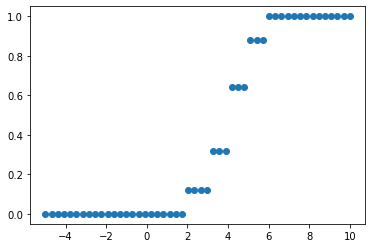

In [96]:
plt.scatter (u,v)

In [ ]:
#считаем выборочное среднее

In [32]:
#stats.mode(x).mode[0]


In [ ]:
# размах вариации 15, 17, 13, 10, 21, 17, 23, 9, 14, 19


In [106]:
# звонки
t = np.array([0,1,2,3,4,5])
n = np.array([8,18,11,7,4,2])

In [107]:
n.sum()

50

In [108]:
#среднее взвешенное значение
med = np.sum(t*n)/50

In [109]:
# линейное отклонения
# модули умножаем на соответствующие частоты
lin_div = np.abs((t - med))*n

In [110]:
lin_div 

array([13.92, 13.32,  2.86,  8.82,  9.04,  6.52])

In [111]:
lin_div.sum()/50

1.0896000000000001

In [112]:
# выборочная дисперсия

div = (t - med)*(t-med)*n

In [113]:
div

array([24.2208,  9.8568,  0.7436, 11.1132, 20.4304, 21.2552])

In [114]:
D = div.sum()/50

In [115]:
D

1.7524000000000002

In [116]:
#поправленная дисперсия по формуле :S = n /n-1 *D
S2 = 50/49*D

In [117]:
S2

1.7881632653061226

In [118]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Типы данных в pandas

In [119]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [120]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [122]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    0.048685
b   -0.920396
c    0.778992
d   -1.123733
e    0.024540
dtype: float64

In [123]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [60]:
#Операции

In [126]:
s[1:]-s[:-1]
# на NaN заменилось где не нашлись индексы

a    NaN
b    0.0
c    0.0
d    0.0
e    NaN
dtype: float64

In [127]:
s[1:]

b   -0.920396
c    0.778992
d   -1.123733
e    0.024540
dtype: float64

In [128]:
s[:-1]

a    0.048685
b   -0.920396
c    0.778992
d   -1.123733
dtype: float64

In [129]:
s.sum()

-1.1919118169866711

In [124]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [141]:
df = pd.read_csv('Churn_Modelling1.csv', index_col = 'rowNumber')

ValueError: Index rowNumber invalid

In [142]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [133]:
df.loc[2:10,["Geography","Gender","Age"]]

,Geography,Gender,Age
2,France,Female,42
3,France,Female,39
4,Spain,Female,43
5,Spain,Male,44
6,France,Male,50
7,Germany,Female,29
8,France,Male,44
9,France,Male,27
10,France,Male,31


In [134]:
df.iloc[2:10,2:5]

,Surname,CreditScore,Geography
2,Onio,502,France
3,Boni,699,France
4,Mitchell,850,Spain
5,Chu,645,Spain
6,Bartlett,822,France
7,Obinna,376,Germany
8,He,501,France
9,H?,684,France


In [ ]:
df.shape

In [ ]:
df.info()

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [143]:
df.groupby(['Geography','Gender'])

In [57]:
#pd.crosstab(df['Exited'], df['Geography']])

In [60]:
df[(df['Geography'] == 'Germany')&(df['HasCrCard'] == 1)]['Age'].mean() 

39.623673925181464

# Визуализация

# 1. признаки по одному
### 1.1. количественные

In [1]:
#df['CreditScore'].hist();

In [2]:
# ящик с усчами
#sns.boxplot(x = df['CreditScore']);

In [4]:
#df.hist();

### 1.2. Категориальные 

In [5]:
#df['Geography'].value_counts()

In [6]:
# most interest
#df['Exited'].value_counts()

In [7]:
# seaborn
#sns.countplot(x = df['Exited']);

In [8]:
#sns.countplot(x = df['Geography']);

In [9]:
#df['Surname'].value_counts().head()

In [10]:
# опасно
#sns.countplot(x = df['Surname']);

In [11]:
#df[df['Surname'].isin(df['Surname'].value_counts().head().index)]
#sns.countplot(x = df[df['Surname'].isin(df['Surname'].value_counts().head().index)]['Surname']);

# 2. Взаимодействие признаков
### 2.1. Количествнные с количественными

In [12]:
#df.columns

In [56]:
#factors = ['CreditScore','Age','EstimatedSalary','Balance']

In [13]:
#df[factors].hist();

In [14]:
#sns.pairplot(df[factors])

In [15]:
# 2 признака 
#plt.scatter(df['Age'], df['Balance'], color = 'green')
#plt.scatter(df['Age'], df['Balance'], color = 'green')
#plt.scatter(df['Age'], df['Balance'], color = df['Exited'].map({0:'blue', 1:'orange'}))
#plt.xlabel('Возраст')
#plt.ylabel('Баланс')

In [16]:
#df['Exited'].map({0:'green', 1:'red'})

In [17]:
#plt.scatter(df['Age'], df['Balance'], color = 'green')

In [18]:
#plt.scatter(df[df['Exited']==0]['Age'], df[df['Exited']==0]['Balance'], color = 'blue', label = 'Остались')
#plt.scatter(df[df['Exited']==1]['Age'], df[df['Exited']==1]['Balance'], color = 'orange', label = 'Свалили')
#df[df['Exited']==0]
#plt.xlabel('Возраст')
#plt.ylabel('Баланс')
#plt.title('Отток - баланс/возраст')
#plt.legend()

In [19]:
#sns.heatmap(df.corr())

In [91]:
#pd.drop()?# axis, inplace

### 2.2. Колич - Категориальный / Колич - Бинарный

In [20]:
#sns.boxplot(x = 'Exited', y = 'Age', data = df);

In [21]:
#sns.boxplot(x = 'Geography', y = 'Age', data = df);

In [22]:
#df.groupby('Geography')['Balance'].mean()

In [23]:
#sns.boxplot(x = 'Geography', y = 'Balance', data = df);

### 2.3. Категориальный - категориальный

In [26]:
#pd.crosstab(df['Exited'], df['Geography'])

In [27]:
#sns.countplot(x = 'Geography', hue = 'Exited', data = df)

In [103]:
#from sklearn.manifold import TSNE

In [104]:
#tsne = TSNE(random_state = 42)

In [105]:
#df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [106]:
#df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [112]:
#df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [109]:
#df['Geography'] = df['Geography'].map({'France': 0, 'Germany':1, 'Spain':2})

In [111]:
#df['Gender'] = df['Gender'].map({'Female': 0, 'Male':1})

In [123]:
#tsne = TSNE(random_state = 0)

In [28]:
#tsne.fit(df)

In [29]:
#tsne.embedding_.shape

In [30]:
#embedding = tsne.fit_transform(df)

In [31]:
#embedding.shape

In [32]:
#plt.scatter(embedding[df.Exited == 0,0], embedding[df.Exited == 0,1], )
#plt.scatter(embedding[df.Exited == 1,0], embedding[df.Exited == 1,1], color = 'orange')